Kmeans e hierarchical com diferentes features

In [1]:
from pre_processing_functions import *
import pandas as pd
from sklearn.cluster import KMeans
import umap.umap_ as umap
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

In [2]:
features = ['distinct_stores_visited', 'lifetime_spend_vegetables',
'lifetime_spend_hygiene', 'percentage_of_products_bought_promotion',
'lifetime_total_distinct_product','lifetime_spend_electronics_videogames']

In [4]:
def kmeans_clustering(path, n_clusters = 10, random_state = 42):
    data = preprocess(path)  
    data= data[['lifetime_spend_groceries', 'lifetime_spend_electronics',
        'typical_hour', 'lifetime_spend_vegetables',
        'lifetime_spend_nonalcohol_drinks', 'lifetime_spend_alcohol_drinks',
        'lifetime_spend_meat', 'lifetime_spend_fish', 'lifetime_spend_hygiene',
        'lifetime_spend_videogames', 'lifetime_spend_petfood',
        'lifetime_total_distinct_products']]
    
    kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)
    cluster_labels = kmeans.fit_predict(data)

    # Add cluster column to the DataFrame
    data_with_clusters = data.copy()
    data_with_clusters['Kmeans_cluster'] = cluster_labels

    return data_with_clusters

In [5]:
try1 = kmeans_clustering('customer_info.csv', n_clusters = 10, random_state = 42)

In [7]:
def umap_kmeans(df, n_neighbors=5, min_dist=0.01):

    # Select only numeric columns (exclude 'cluster' since it is our 'target')
    features = df.select_dtypes(include='number').drop(columns=['Kmeans_cluster'], errors='ignore')
    features_scaled = features.values

    reducer = umap.UMAP(n_neighbors=n_neighbors, min_dist=min_dist, random_state=42)
    embedding = reducer.fit_transform(features_scaled)

    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=embedding[:, 0], y=embedding[:, 1], hue=df['Kmeans_cluster'], palette='tab10', s=70)
    plt.title("UMAP clusters - Kmeans")
    plt.xlabel("UMAP 1")
    plt.ylabel("UMAP 2")
    plt.legend(title="Cluster")
    plt.tight_layout()
    plt.show()

/Users/matildepanarra/anaconda3/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/matildepanarra/anaconda3/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


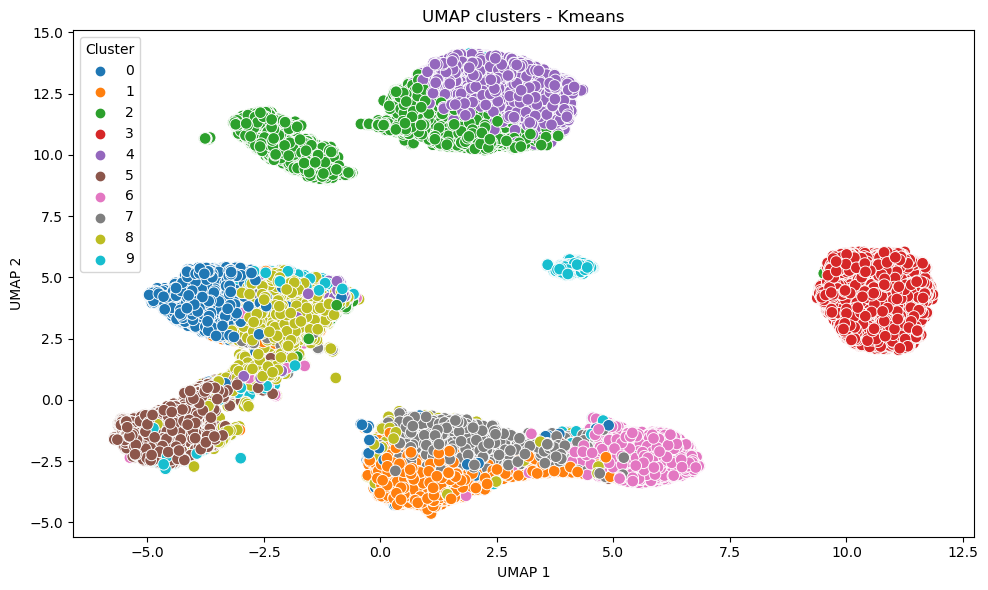

In [8]:
umap_kmeans(try1, n_neighbors=5, min_dist=0.01)


In [ ]:
def hierarchical_clustering(path, n_clusters= 10, linkage= 'ward') :
   
    data = preprocess(path) 
    data= data[['lifetime_spend_groceries', 'lifetime_spend_electronics',
        'typical_hour', 'lifetime_spend_vegetables',
        'lifetime_spend_nonalcohol_drinks', 'lifetime_spend_alcohol_drinks',
        'lifetime_spend_meat', 'lifetime_spend_fish', 'lifetime_spend_hygiene',
        'lifetime_spend_videogames', 'lifetime_spend_petfood',
        'lifetime_total_distinct_products']]
    
    model = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage)
    cluster_labels = model.fit_predict(data)

    # Add the cluster column to the DataFrame
    data_with_clusters = data.copy()
    data_with_clusters['hierarchical_cluster'] = cluster_labels

    return data_with_clusters